In [611]:
import pandas as pd
import numpy as np
import nirsimple as ns
from scipy.signal import butter, filtfilt

In [612]:
file_name="D:\FYP\Our Data\Poojani\\heart beat_1"
f = open(file_name+".txt",'rt')

In [613]:
data=f.readlines()

In [614]:
oxy_data=[]
deoxy_data=[]

Arranging ADC Data into arrays

In [615]:
for line in data:
    #print(line)
    if line[0]=='O':
        oxy=True
    elif line[0]=='D':
        oxy=False
    else:
        l=line[:-9].split()
        values=[]
        for i in l:
            values.append(int(i[4:]))
        if oxy:
            oxy_data.append(values)
        else:
            deoxy_data.append(values)
print(deoxy_data)
oxy_np=np.array(oxy_data)
deoxy_np=np.array(deoxy_data)
    

[[64, 245, 67, 84, 78], [64, 251, 65, 80, 72], [64, 248, 65, 85, 70], [64, 243, 66, 90, 71], [65, 241, 65, 87, 76], [64, 246, 67, 81, 71], [64, 243, 65, 86, 69], [64, 239, 64, 90, 68], [64, 235, 67, 90, 75], [65, 243, 65, 87, 75], [65, 236, 66, 90, 69], [65, 245, 65, 91, 76], [64, 260, 65, 84, 80], [65, 252, 67, 83, 72], [65, 247, 66, 88, 70], [65, 242, 67, 89, 74], [67, 247, 67, 84, 78], [65, 249, 67, 81, 75], [65, 248, 68, 86, 70], [65, 246, 66, 87, 75], [64, 266, 66, 81, 75], [65, 260, 65, 85, 72], [64, 250, 66, 90, 78], [64, 251, 65, 90, 81], [64, 257, 65, 86, 80], [64, 250, 66, 89, 72], [64, 243, 65, 91, 76], [63, 249, 65, 90, 81], [64, 256, 66, 86, 78], [65, 265, 65, 82, 73], [64, 253, 66, 88, 77], [65, 262, 65, 85, 76], [64, 260, 66, 85, 68], [65, 251, 66, 88, 69], [64, 246, 65, 90, 77], [64, 257, 67, 84, 80], [64, 252, 65, 84, 72], [64, 248, 65, 90, 69], [65, 242, 66, 91, 70], [65, 247, 66, 87, 75], [65, 240, 66, 92, 68], [65, 241, 66, 96, 75], [65, 241, 66, 89, 77], [65, 248, 

In [616]:
print(oxy_np.shape)
print(deoxy_np.shape)

(650, 5)
(650, 5)


In [617]:
arr_len=min(len(oxy_np),len(deoxy_np))
oxy_np=oxy_np[:arr_len]
deoxy_np=deoxy_np[:arr_len]
print(deoxy_np.shape)

(650, 5)


In [618]:
def butterworth(data):
    Fs = 10  # Hz (example)
    Fc = 0.1  # Hz cutoff

# Normalize the cutoff frequency by the Nyquist frequency (half of Fs)
    nyq = 0.5 * Fs
    norm_Fc = Fc / nyq

# Design the 4th order Butterworth filter
    b, a = butter(4, norm_Fc, btype='lowpass', analog=False)
    filtered_data=np.zeros(data.shape)
# Apply the filter (forward-backward filtering for better stability)
    for i in range(data.shape[1]):
  # Filter the current channel (row) and store it in the corresponding row of filtered_data
        filtered_data[:,i] = filtfilt(b, a, data[:, i])
    
    return filtered_data

In [619]:
def filter(data):
    mean=np.mean(data)
    baseline_corrected=data-mean
    filtered=butterworth(baseline_corrected)
    return filtered

In [620]:
filtered_oxy_adc=filter(oxy_np)
filtered_deoxy_adc=filter(deoxy_np)

In [621]:
oxy_adc_df=pd.DataFrame(filtered_oxy_adc,columns=['channel1_o','channel2_o','channel3_o','channel4_o','channel5_o'])
deoxy_adc_df=pd.DataFrame(filtered_deoxy_adc,columns=['channel1_d','channel2_d','channel3_d','channel4_d','channel5_d'])

In [622]:
import matplotlib.pyplot as plt

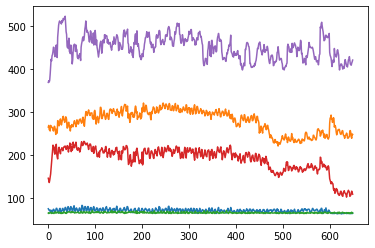

In [635]:
plt.plot(oxy_np)


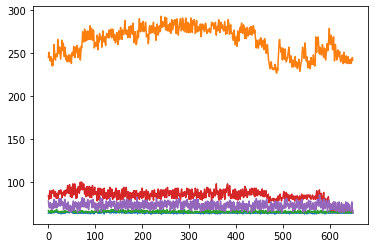

In [636]:
plt.plot(deoxy_np)

ADC Values

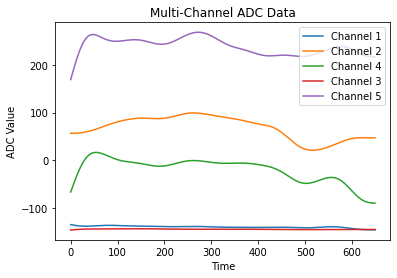

In [623]:

plt.plot(oxy_adc_df['channel1_o'], label='Channel 1')  # Add label for channel1
plt.plot(oxy_adc_df['channel2_o'],label='Channel 2')  # Uncomment if you want to include channel2
plt.plot(oxy_adc_df['channel4_o'], label='Channel 4')
plt.plot(oxy_adc_df['channel3_o'], label='Channel 3')
plt.plot(oxy_adc_df['channel5_o'], label='Channel 5')

plt.legend()

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


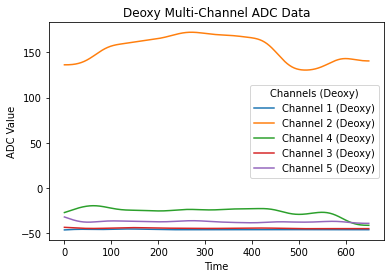

In [624]:

plt.plot(deoxy_adc_df['channel1_d'], label='Channel 1 (Deoxy)')  # Add label with clarification
plt.plot(deoxy_adc_df['channel2_d'], label='Channel 2 (Deoxy)')
plt.plot(deoxy_adc_df['channel4_d'], label='Channel 4 (Deoxy)')
plt.plot(deoxy_adc_df['channel3_d'], label='Channel 3 (Deoxy)')
plt.plot(deoxy_adc_df['channel5_d'], label='Channel 5 (Deoxy)')

# Add the legend with title
plt.legend(title='Channels (Deoxy)')

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Deoxy Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


Optical Density

c:\Python310\cv\lib\site-packages\nirsimple\preprocessing.py:127: UserWarning: some intensities are negative or equal to zero
  warnings.warn("some intensities are negative or equal to zero")


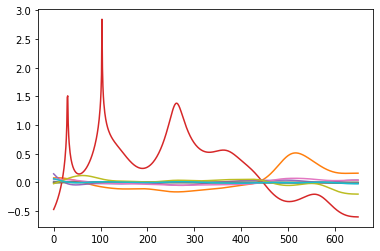

In [625]:
combined_ADC=np.concatenate((filtered_oxy_adc,filtered_deoxy_adc,),axis=1)
dod = ns.intensities_to_od_changes(combined_ADC.T)
plt.plot(dod.T)


In [626]:
#combined=np.concatenate((oxy_od_np,deoxy_od_np,),axis=1)
raw_ch_names=['1-1', '1-2', '1-3', '1-4','1-5','1-1', '1-2', '1-3', '1-4','1-5']
ch_wl=[850, 850, 850, 850, 850, 720, 720, 720, 720,720]
unique_dpf = 6
ch_dpf = [unique_dpf for _ in enumerate(raw_ch_names)]
unique_distance = 3  # cm
#ch_distances = [unique_distance for _ in enumerate(raw_ch_names)]
ch_distances=[3,3,3,1,3,3,3,3,1,3]
data = ns.mbll(dod, raw_ch_names, ch_wl, ch_dpf, ch_distances,
               unit='cm', table='wray')
dc, ch_names, ch_types = data
print(dc.shape)
concentrations=dc.T



(10, 650)


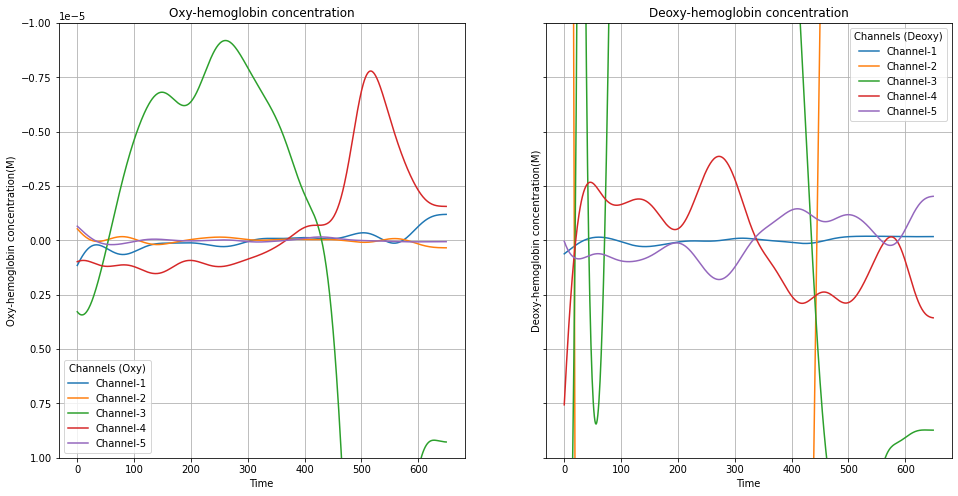

In [627]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))  # 2 rows, 1 column, shared y-axis

ax1.plot(concentrations[:,0],label='Channel-1')
ax1.plot(concentrations[:,1],label='Channel-2')
ax1.plot(concentrations[:,2],label='Channel-3')
ax1.plot(concentrations[:,3],label='Channel-4')
ax1.plot(concentrations[:,4],label='Channel-5')
ax1.legend(title='Channels (Oxy)')

lim=1*-10**-5
ax1.set_xlabel('Time')
ax1.set_ylabel('Oxy-hemoglobin concentration(M)')
ax1.set_title('Oxy-hemoglobin concentration')
ax1.grid(True)  # Add grid lines for better readability
ax1.set_ylim(-lim,lim)

ax2.plot(concentrations[:,5],label='Channel-1')
ax2.plot(concentrations[:,6],label='Channel-2')
ax2.plot(concentrations[:,7],label='Channel-3')
ax2.plot(concentrations[:,8],label='Channel-4')
ax2.plot(concentrations[:,9],label='Channel-5')
ax2.legend(title='Channels (Deoxy)')
ax2.set_ylim(-lim,lim)
ax2.set_xlabel('Time')
ax2.set_ylabel('Deoxy-hemoglobin concentration(M)')
ax2.set_title('Deoxy-hemoglobin concentration')
ax2.grid(True)  # Add grid lines for better readability

plt.show()

In [628]:
short_channel_oxy=concentrations[:,3]
short_channel_deoxy=concentrations[:,8]


long_channels_oxy=np.delete(concentrations[:,:5],3,axis=1)
print(long_channels_oxy.shape)
long_channels_deoxy=np.delete(concentrations[:,5:],3,axis=1)
print(long_channels_oxy.shape)


(650, 4)
(650, 4)


In [629]:

short_channel_removed_oxy = long_channels_oxy - short_channel_oxy[:, np.newaxis]  # Reshape arr2 to (370,1)
short_channel_removed_deoxy = long_channels_deoxy - short_channel_deoxy[:, np.newaxis]


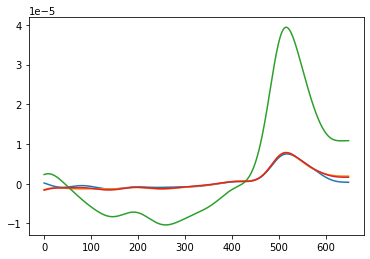

In [630]:
plt.plot(short_channel_removed_oxy)

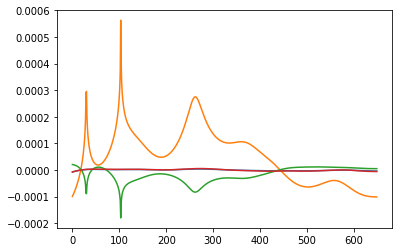

In [631]:
plt.plot(short_channel_removed_deoxy)

In [632]:
preprocessed=np.concatenate([short_channel_removed_oxy,short_channel_removed_deoxy],axis=1)
preprocessed.shape

(650, 8)

In [633]:
conc_df=pd.DataFrame(preprocessed)
conc_df.to_csv(file_name+'.csv')